# Task 3: Linear Regression

**Step 1** : Import Libraries and Load the Dataset

In [2]:
import pandas as pd # Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to display plots in notebook
%matplotlib inline

In [3]:
df = pd.read_csv('Housing.csv')    # Load the dataset

In [4]:
df.head()   # Show first few rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Step 2** : Explore and Understand the Data

In [5]:
print("Shape of the dataset:", df.shape)  # Check the shape of the dataset

Shape of the dataset: (545, 13)


In [6]:
df.info()  # Get basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()  # Summary statistics for numeric columns

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.isnull().sum() # Check for missing values

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


 **Step 3** : Preprocess the Data

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns  # Check which columns are categorical
print("Categorical columns:\n", categorical_cols)

Categorical columns:
 Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)  # Apply one-hot encoding to categorical columns

In [11]:
df_encoded.head()  # View the first few rows of the processed data


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


**Step 4** : Split the Data (Training & Testing)

Let’s split the data into:

*  X → Features (independent variables)

*  y → Target (price)

*  Then divide it into training and testing parts (80% train, 20% test)

In [12]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Show the shape of the splits
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (436, 13)
X_test : (109, 13)
y_train: (436,)
y_test : (109,)


**Step 5** : Fit Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # Initialize the model
model.fit(X_train, y_train) # train the model

y_pred = model.predict(X_test) # Predict on test data

**Step 6**: Evaluate the Model

Now let’s calculate how well your model is performing using:

*  MAE – Mean Absolute Error

*  MSE – Mean Squared Error

*  R² Score – How well the model explains the variance

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
# printing mae, mse, r2
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 970043.4039201636
Mean Squared Error (MSE): 1754318687330.6638
R² Score: 0.6529242642153184


**Step 7** : Plot Predicted vs Actual (Visualization)

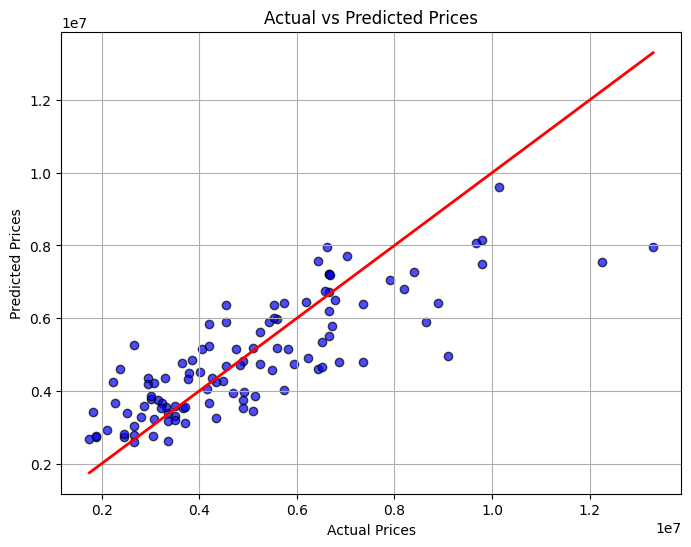

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

**Step 8**: Interpret Coefficients

This shows:

*  Positive values = increase the price

*  Negative values = decrease the price

In [21]:
# Show feature names and their coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

In [22]:
coefficients

,Feature,Coefficient
0,area,2.359688e+02
1,bedrooms,7.677870e+04
2,bathrooms,1.094445e+06
3,stories,4.074766e+05
4,parking,2.248419e+05
5,mainroad_yes,3.679199e+05
6,guestroom_yes,2.316100e+05
7,basement_yes,3.902512e+05
8,hotwaterheating_yes,6.846499e+05
9,airconditioning_yes,7.914267e+05


So, Task 3 is completed.